#### This dataset contains information about used cars.
##### This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


#### The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner

## import the the Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### Loading The Data 

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

# Data Preprocessing

In [6]:
# we have to chek the categorical and numerical uniques values 
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
#we have to check the any null values in our dataset
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
## we have not requrired car names y bcz its have num of categorical values there so we remove car_name
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
#we have create new column that is current year why this bcz we havt to subtract the no of years 
final_dataset['Current_year']=2021 #assigning current year 

In [12]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021


In [13]:
# we have to create the no of years values 
final_dataset['No_of_years']=final_dataset['Current_year']-final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
#we have add no of years so we will drop the Original Year abd current year 
final_dataset.drop(['Year',],axis=1,inplace=True)
final_dataset.drop(['Current_year'],axis=1,inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


#### converting the categorical values to numericals

In [17]:
# we have do one hot encoding with pandas get dummies
final_dataset =pd.get_dummies(final_dataset,drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
# we have to see the data statistical calculations
final_dataset.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# we have to chek the correlation of data
corr = final_dataset.corr()

<AxesSubplot:>

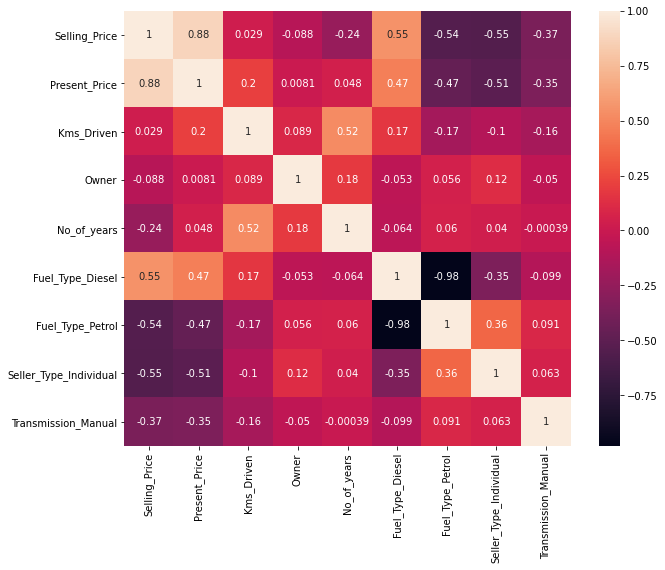

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2g')

<Figure size 720x576 with 0 Axes>

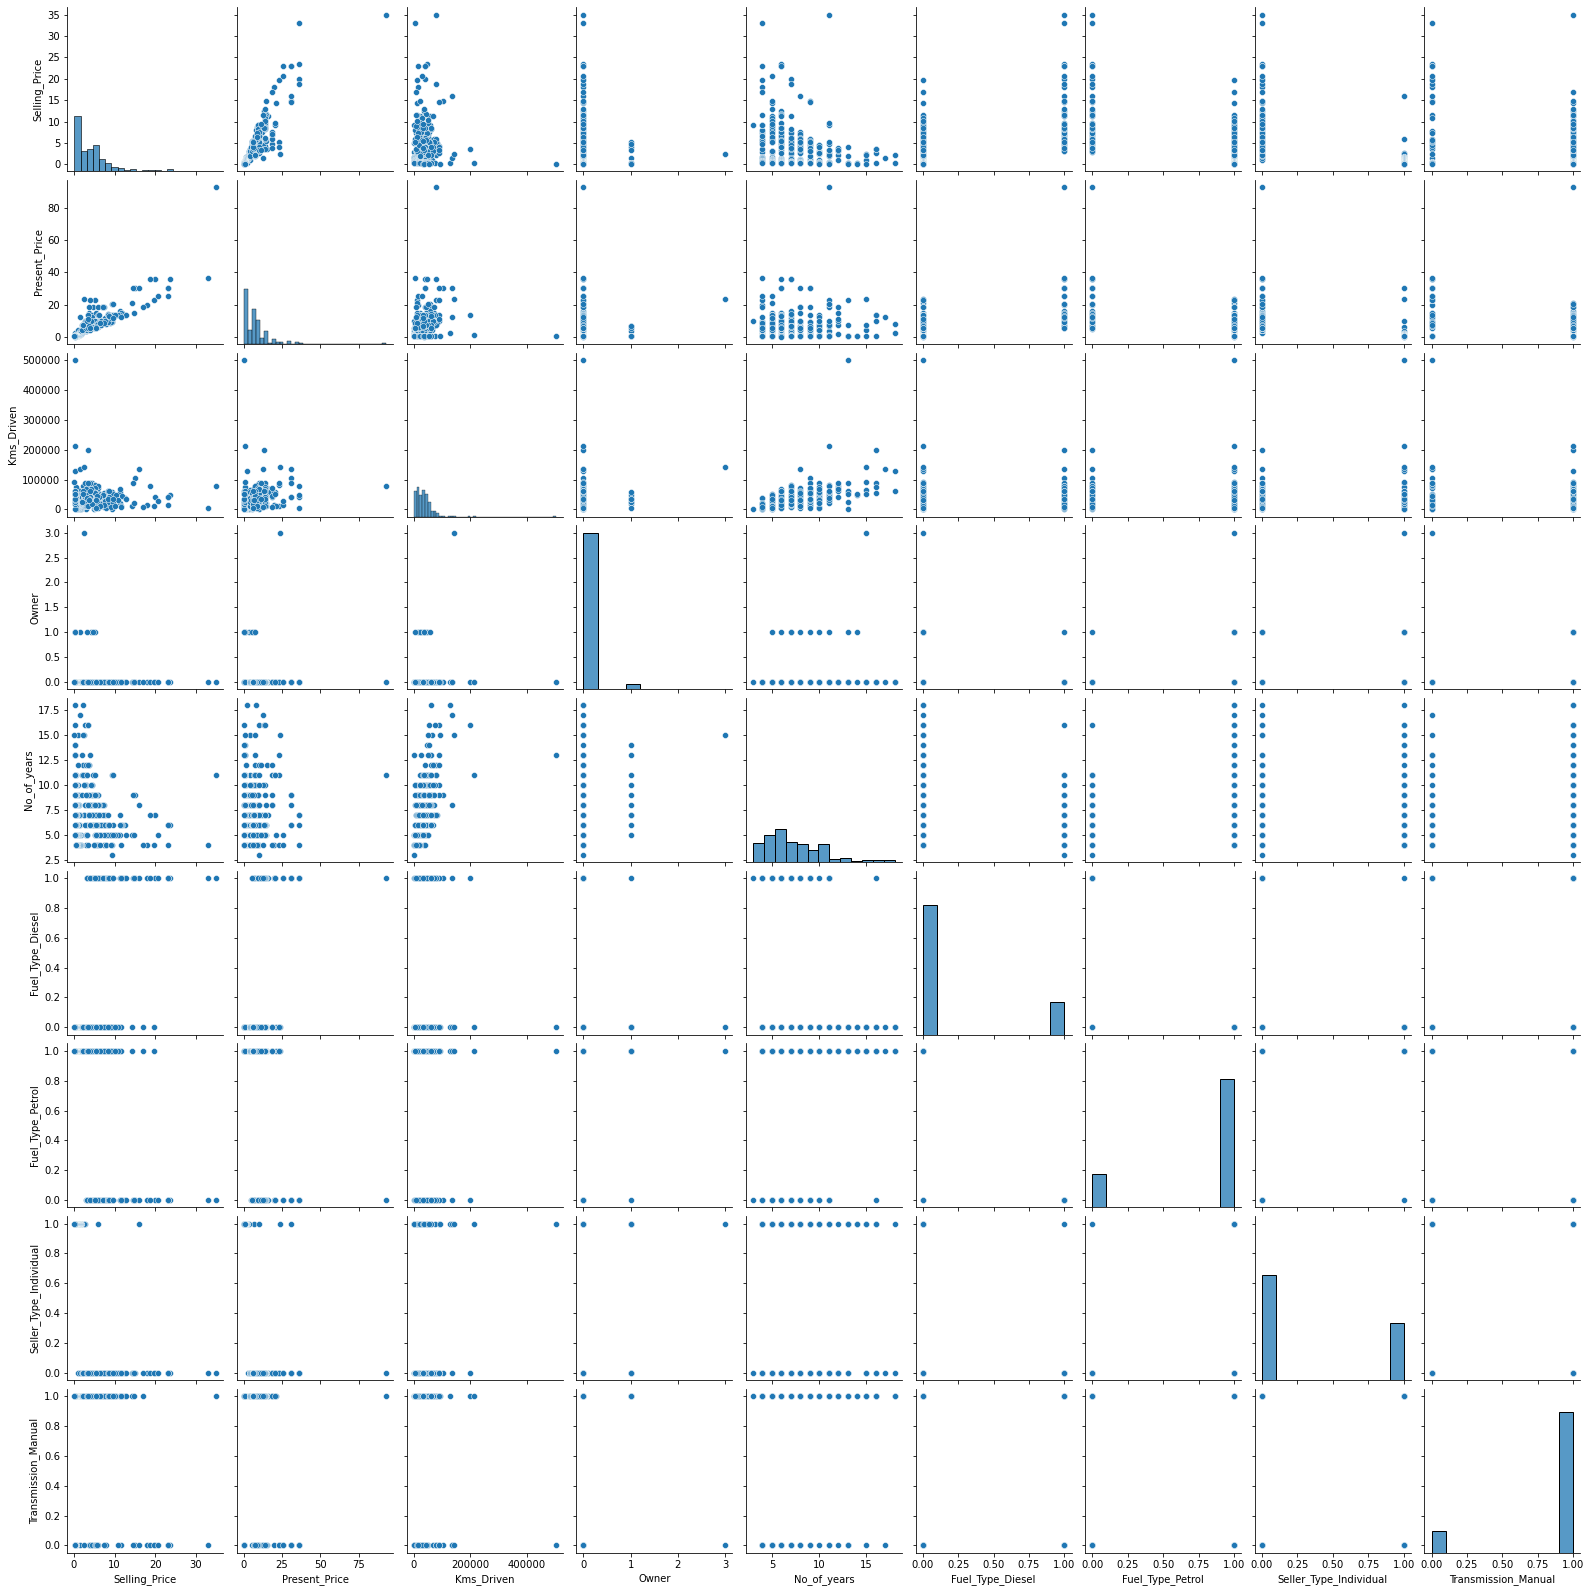

In [22]:
plt.figure(figsize=(10,8))
sns.pairplot(final_dataset)

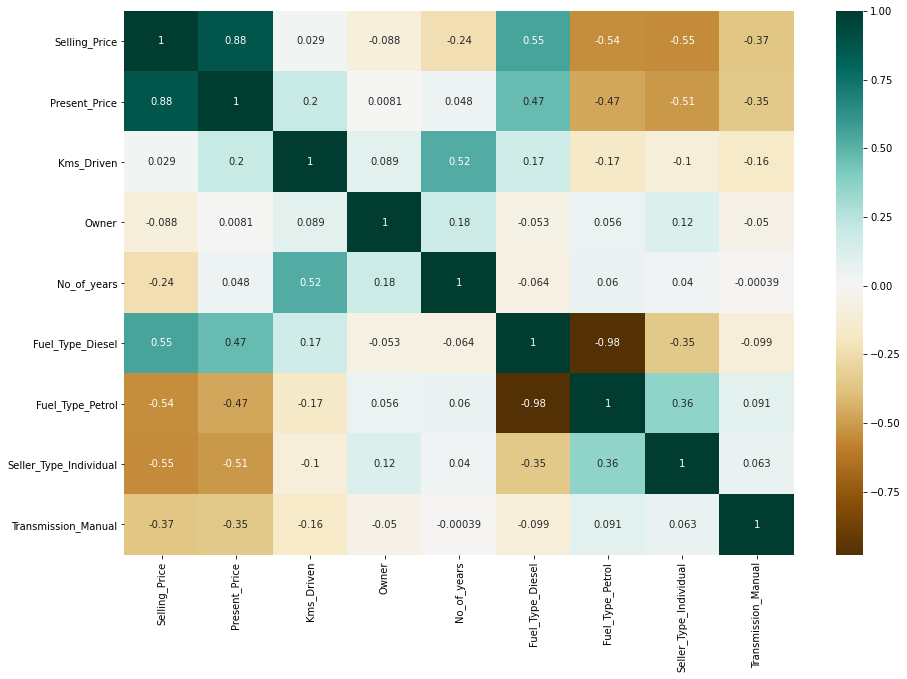

In [23]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='BrBG')

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [25]:
#we have to seperate the data variables as independent and dependent for splitting purpose
X = final_dataset.iloc[: ,1:]
y = final_dataset.iloc[: ,:1]

In [26]:
print('Shape of X is ',X.shape)
print('Shape of y is ',y.shape)

Shape of X is  (301, 8)
Shape of y is  (301, 1)


### Feature Importance

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[3.87254645e-01 4.22236737e-02 3.80073235e-04 7.53207752e-02
 2.18630622e-01 1.53358465e-02 1.28933940e-01 1.31920424e-01]


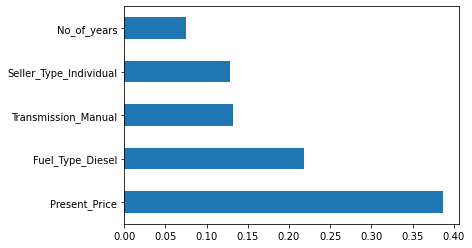

In [29]:
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

# Splitting Data

In [30]:
# we have to split the data to avoiding the overfitting 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
X_train.shape,X_test.shape

((240, 8), (61, 8))

In [32]:
y_train,y_test = y_train.to_numpy(),y_test.to_numpy()

In [33]:
y_train.shape,y_test.shape

((240, 1), (61, 1))

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_test_scaled[:5]

array([[ 0.24002239,  1.48232869, -0.29880715, -0.43059452,  1.75119007,
        -1.75119007, -0.67259271,  0.46904158],
       [-0.95463948, -1.18829417, -0.29880715,  1.09208754, -0.57104024,
         0.57104024,  1.48678388,  0.46904158],
       [-0.27551866, -0.28759007, -0.29880715, -0.43059452, -0.57104024,
         0.57104024, -0.67259271,  0.46904158],
       [ 0.54656031,  0.16136352, -0.29880715, -0.81126503,  1.75119007,
        -1.75119007, -0.67259271,  0.46904158],
       [ 1.68493067, -0.75428963, -0.29880715, -1.19193554,  1.75119007,
        -1.75119007, -0.67259271, -2.13200716]])

## Creating Models , Train The Models, Evaluate The Models

In [35]:
#we have import the  regression librarires 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
# linear regression model creating with parameters
model_lr = LinearRegression(
    fit_intercept=True,
    normalize=True,
    n_jobs=1,
    positive=False,
)

In [37]:
# train the model 
model_lr.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=1, normalize=True)

In [38]:
# prediction the model
y_pred_lr = model_lr.predict(X_test_scaled)

## Model Evaluation

In [39]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_lr))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

<IPython.core.display.Javascript object>

Score: 0.9081216763532295


<IPython.core.display.Javascript object>

MAE  : 1.12596961307559


<IPython.core.display.Javascript object>

MSE  : 2.3224376565224154


<IPython.core.display.Javascript object>

RMSE : 1.5239546110440478


In [40]:
# Ridge regression model creating with parameters
model_R = Ridge(alpha=0.0001,
    fit_intercept=True,
    normalize=False,
    max_iter=10,
    tol=0.001,
    solver='auto',
    random_state=2,
)

In [41]:
# train the model 
model_R.fit(X_train_scaled,y_train)

Ridge(alpha=0.0001, max_iter=10, random_state=2)

In [42]:
# prediction the model
y_pred_R = model_R.predict(X_test_scaled)
y_pred_R[:5]

array([[ 7.05568356],
       [-1.44468069],
       [ 3.82109139],
       [ 8.99819756],
       [15.23223121]])

In [43]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_R))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_R))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_R))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))

<IPython.core.display.Javascript object>

Score: 0.9081216877212683


<IPython.core.display.Javascript object>

MAE  : 1.125969510653357


<IPython.core.display.Javascript object>

MSE  : 2.3224373691688753


<IPython.core.display.Javascript object>

RMSE : 1.5239545167651414


In [44]:
model_lasso = Lasso(
    alpha=0.01,
    fit_intercept=True,
    normalize=False,
    max_iter=1000,
    tol=0.0001,
    warm_start=True,
    positive=False,
    random_state=2,
    selection='cyclic',
)

In [45]:
model_lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.01, random_state=2, warm_start=True)

In [46]:
y_pred_lasso = model_lasso.predict(X_test_scaled)

In [47]:
# score and errors 
print('Score:', metrics.r2_score(y_test, y_pred_R))
print('MAE  :', metrics.mean_absolute_error(y_test, y_pred_R))
print('MSE  :', metrics.mean_squared_error(y_test, y_pred_R))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))

<IPython.core.display.Javascript object>

Score: 0.9081216877212683


<IPython.core.display.Javascript object>

MAE  : 1.125969510653357


<IPython.core.display.Javascript object>

MSE  : 2.3224373691688753


<IPython.core.display.Javascript object>

RMSE : 1.5239545167651414


In [48]:
# we will create Randomforest model
from sklearn.ensemble import RandomForestRegressor

In [49]:
regressor=RandomForestRegressor()

In [50]:
#creating parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [51]:
# we can use RandomizedSerarchCV  for model best model selection
from sklearn.model_selection import RandomizedSearchCV

In [52]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [53]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [55]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10,
                               cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = 1)


In [56]:
## MOdel training
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
#prediction from rf model
prediction = rf_random.predict(X_test_scaled)

<AxesSubplot:ylabel='Density'>

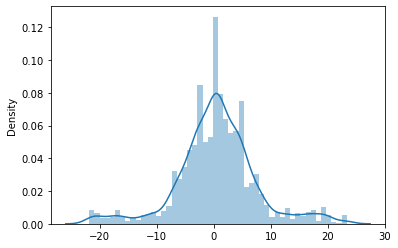

In [58]:
#loss of distribution
sns.distplot(y_test-prediction)

In [59]:
# score and errors 
print('Score:', metrics.r2_score(y_test, prediction))
print('MAE  :', metrics.mean_absolute_error(y_test, prediction))
print('MSE  :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

<IPython.core.display.Javascript object>

Score: 0.946973582544459


<IPython.core.display.Javascript object>

MAE  : 0.7870795282894859


<IPython.core.display.Javascript object>

MSE  : 1.3403656466641982


<IPython.core.display.Javascript object>

RMSE : 1.1577416148105752


In [60]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
from pickle import load

rf = load(open('random_forest_regression_model.pkl', 'rb'))